In [25]:

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [26]:
df = pd.read_csv('data/Dutch weekly survey on leftright political orientation 19781996.csv')
df.set_index('time').sort_index()
df.describe()

,time,Orr,Vvd,Cda,D66,Pvda,Glef,wnOrr,wnVvd,wnCda,wnD66,wnPvda,wnGlef
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,494.500000,5.701221,4.846538,4.752026,3.625806,3.009528,2.444326,30.213563,123.431174,225.471660,89.376518,246.745951,47.281377
std,285.355334,0.369735,0.194378,0.244103,0.124735,0.133764,0.204774,12.083966,52.273774,78.871114,53.935850,104.555717,19.589448
min,1.000000,4.375000,4.317600,4.185700,3.150000,2.538500,1.857100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,247.750000,5.448300,4.703375,4.583100,3.541025,2.924950,2.305600,23.000000,92.000000,181.000000,47.000000,175.750000,35.000000
50%,494.500000,5.688400,4.845450,4.739450,3.624250,3.016750,2.441300,29.000000,111.000000,216.000000,88.500000,247.000000,45.000000
75%,741.250000,5.944775,4.983450,4.921125,3.703250,3.102800,2.593350,35.000000,143.000000,262.000000,128.000000,292.000000,56.000000
max,988.000000,6.900000,5.396000,5.357800,4.208300,3.412800,3.073200,101.000000,448.000000,622.000000,378.000000,720.000000,168.000000


Отрисовываем временной ряд

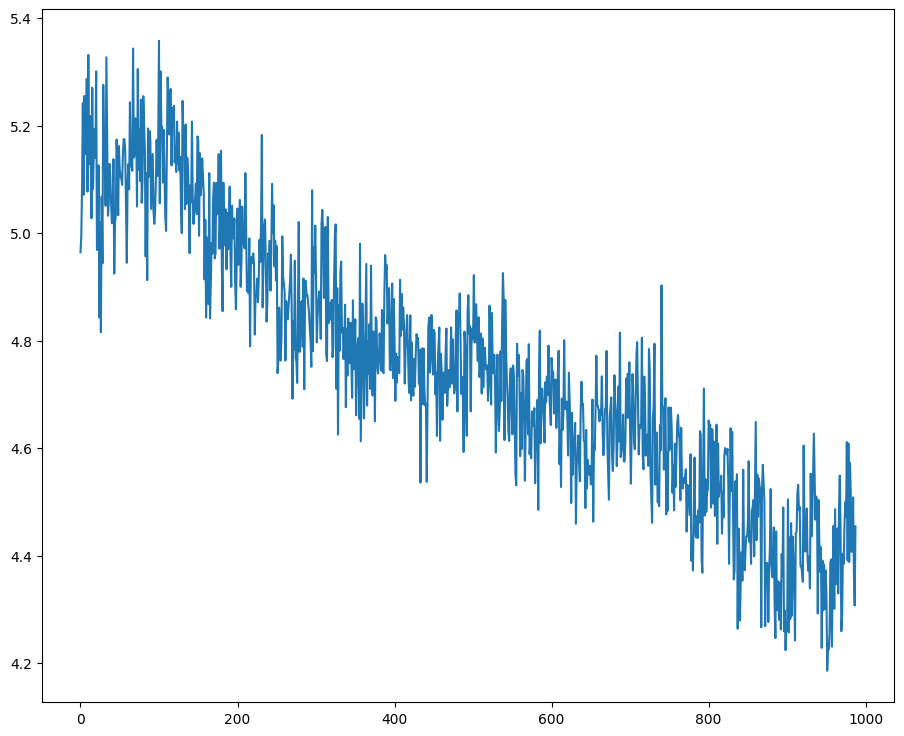

In [27]:
plt.plot(df['Cda'])

In [28]:
# импортируем функцию, описывающую тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
name = "Cda"

# определяем временной ряд отдельной переменной
ts = df['Cda']
def PrintFuller(alpha,name,ts):
    print(f'Тест Дики-Фуллера ряда {name} :')
    # определяем результат значения теста из библиотеки с учетом
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dfoutput["p-value"] < alpha:
        print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")
PrintFuller(alpha,name,ts)



Тест Дики-Фуллера ряда Cda :
Test Statistic                  -1.255179
p-value                          0.649421
#Lags Used                      19.000000
Number of Observations Used    968.000000
Critical Value (1%)             -3.437123
Critical Value (5%)             -2.864530
Critical Value (10%)            -2.568362
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


А теперь попробуем осуществить дифференцирование. Перед этим опять попробуем декомпозицию ряда.

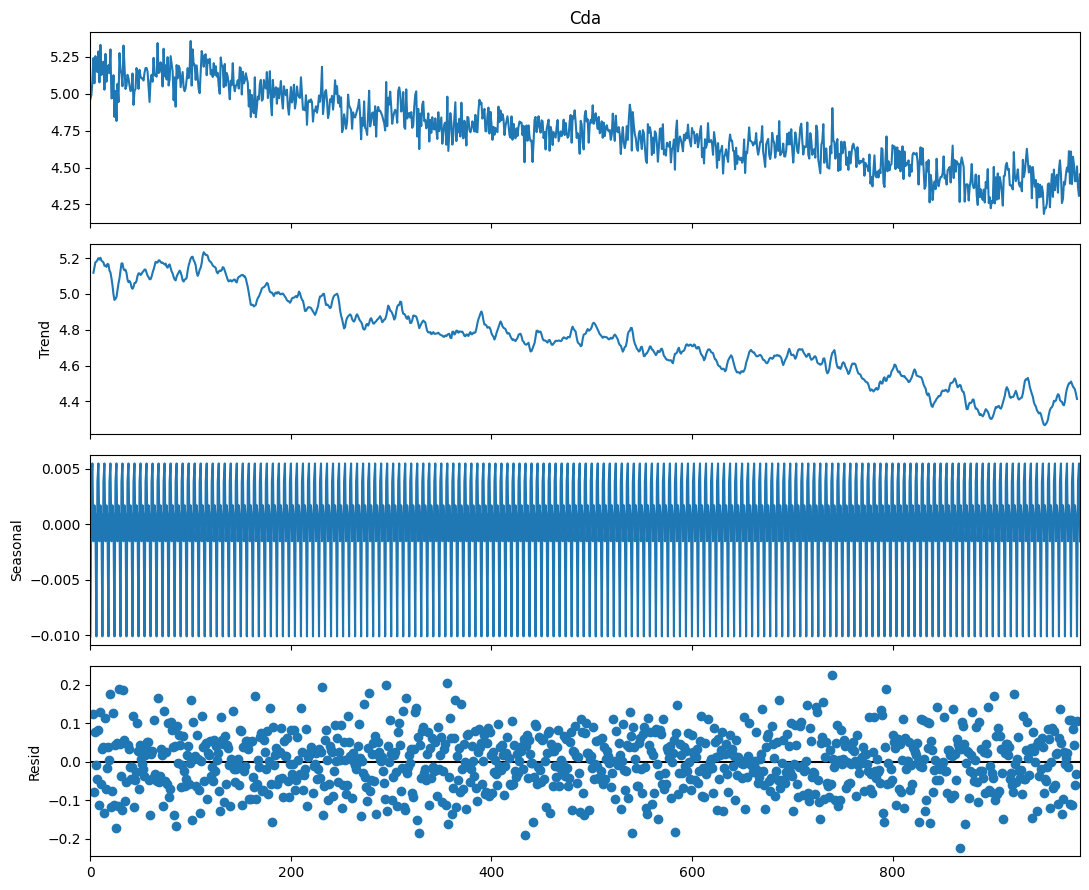

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о перевозках
decompose = seasonal_decompose(df['Cda'], period=6)
decompose.plot()
plt.show()

Создадим два временных ряда на основе имеющегося, только без тренда и сезонности.

Удаляем тренд согласно формуле: $y' = y_t - y_{t-1}$;

Удаляем сезонность согласно формуле: $y' = y_t - y_{t-s}$;

In [30]:
nottrend = []
s = 6
notseason = []

# выборка без тренда
for i in range(1, len(df["Cda"])):
   nottrend.append(df["Cda"][i] - df["Cda"][i-1])

# выборка без сезонности
for i in range(s, len(df["Cda"])):
   notseason.append(df["Cda"][i] - df["Cda"][i-s])

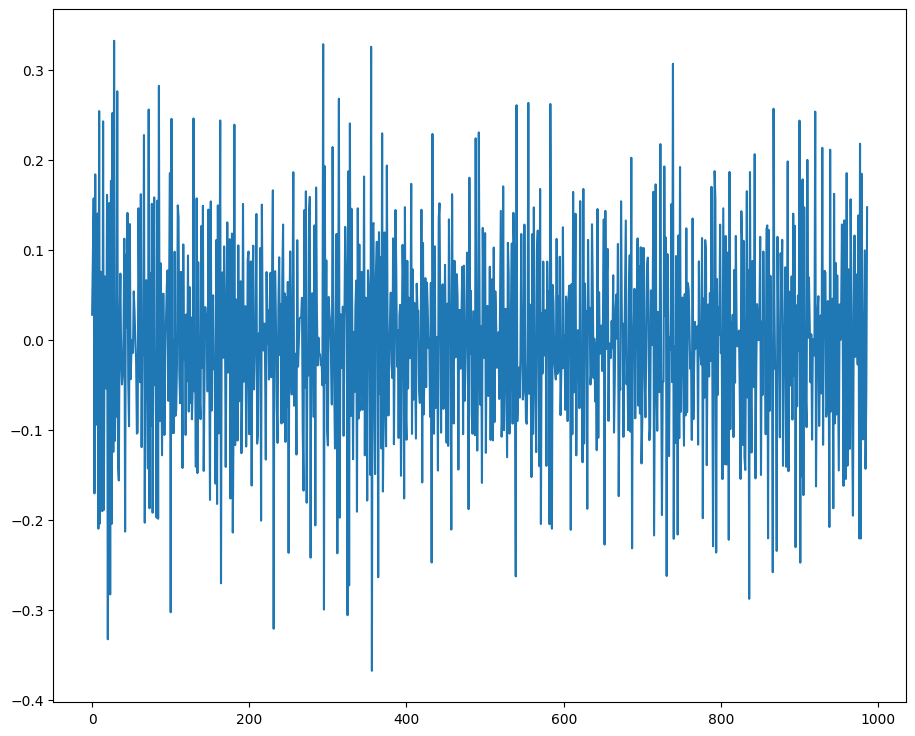

In [31]:
# отрисовываем временной ряд без тренда
plt.plot(nottrend)

In [32]:
name = "Cda без тренда"
ts = nottrend

PrintFuller(alpha,name,ts)

Тест Дики-Фуллера ряда Cda без тренда :
Test Statistic                -1.123276e+01
p-value                        1.889593e-20
#Lags Used                     1.800000e+01
Number of Observations Used    9.680000e+02
Critical Value (1%)           -3.437123e+00
Critical Value (5%)           -2.864530e+00
Critical Value (10%)          -2.568362e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


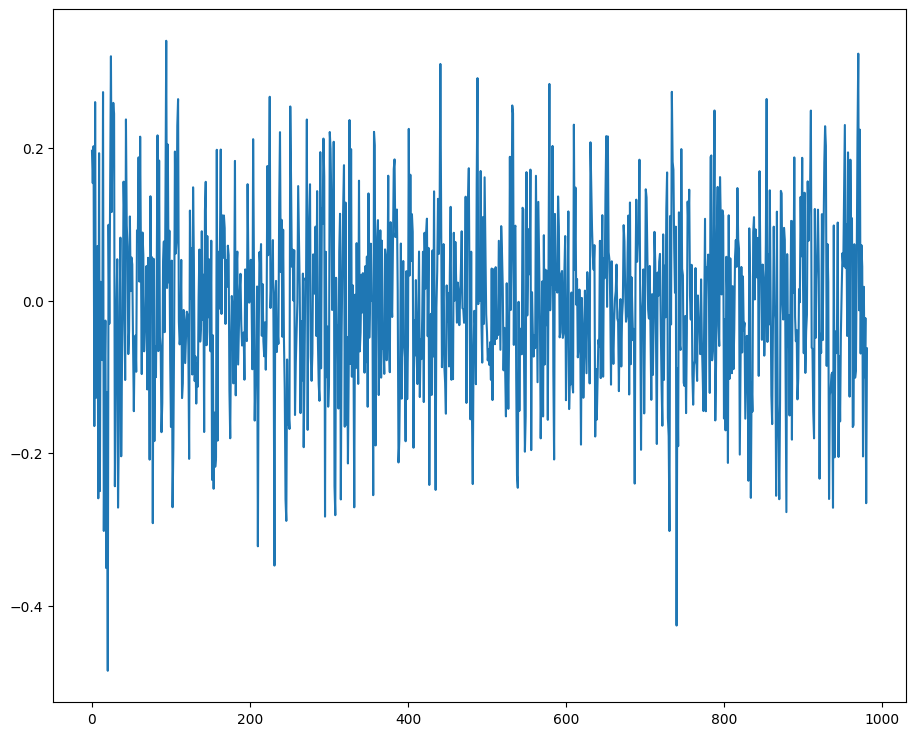

In [33]:
# отрисовываем временной ряд без сезонности
plt.plot(notseason)

In [34]:
name = "Cda без сезона"
ts = notseason
PrintFuller(alpha,name,ts)

Тест Дики-Фуллера ряда Cda без сезона :
Test Statistic                -9.338863e+00
p-value                        8.908768e-16
#Lags Used                     1.800000e+01
Number of Observations Used    9.630000e+02
Critical Value (1%)           -3.437159e+00
Critical Value (5%)           -2.864546e+00
Critical Value (10%)          -2.568371e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Преобразование Бокса-Кокса

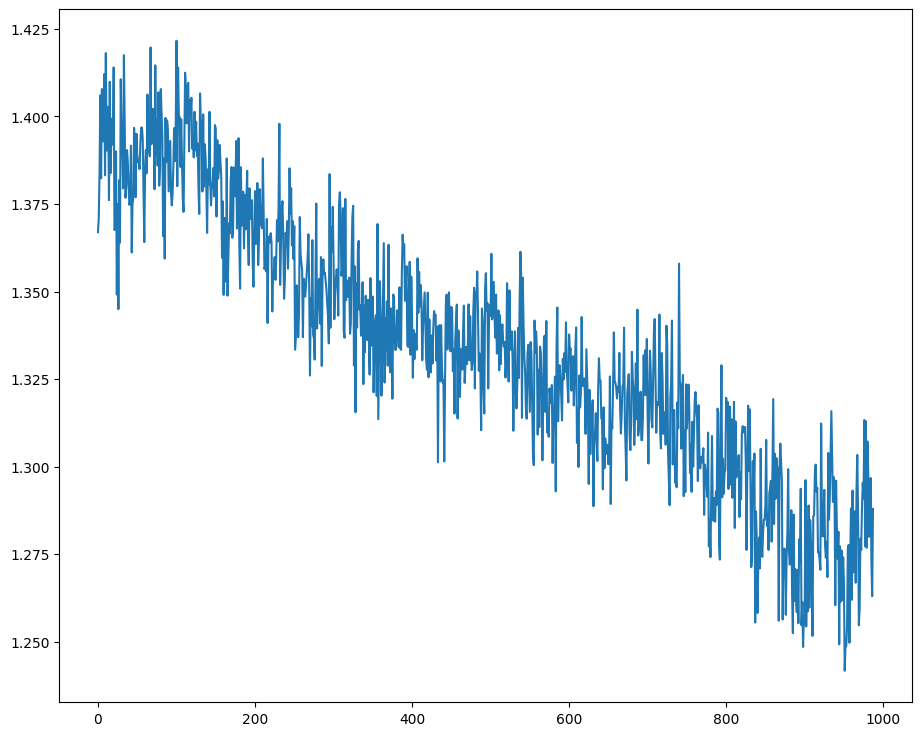

In [35]:
# Преобразование Бокса-Кокса
from scipy.stats import boxcox 

# вызываем функцию преобразования, которая выдает преобразованные данные и
# лучший параметр лямбда, который обеспечивает близость к нормальному
# распределению
transformed_data, best_lambda = boxcox(df["Cda"]) 

# а теперь посмотрим на преобразованные данные
plt.plot(transformed_data) 

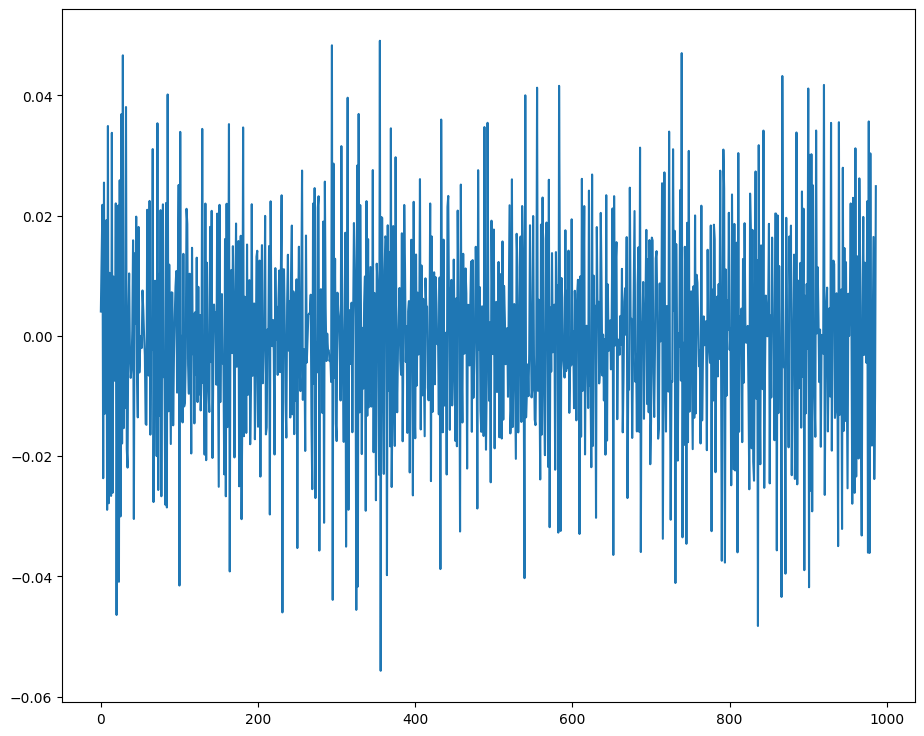

In [36]:
#преобразованный ряд без тренда

pnottrend = []

for i in range(1, len(transformed_data)):
   pnottrend.append(transformed_data[i] - transformed_data[i-1])


plt.plot(pnottrend) 

In [37]:
name = "Cda после Кокса-Бокса"
ts = pnottrend

PrintFuller(alpha,name,ts)

Тест Дики-Фуллера ряда Cda после Кокса-Бокса :
Test Statistic                -1.111828e+01
p-value                        3.518023e-20
#Lags Used                     1.800000e+01
Number of Observations Used    9.680000e+02
Critical Value (1%)           -3.437123e+00
Critical Value (5%)           -2.864530e+00
Critical Value (10%)          -2.568362e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Модели для предсказания значений временного ряда

Следаем прогноз с помощью AR модели, предварительно поделив выборки на обучающую, валидационную и тестовую.

In [38]:
df = pd.DataFrame(pd.concat([df['time'],df['Cda']], axis=1))

df = df.rename(columns={'time': 't', 'Cda': 'x'})

df['t'] = df.index.values

ln = len(df)

# указываем 'объемы' выборок
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

# делим выборки
train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

Визуализируем поделенные выборки.

* Обучающая выборка - синим цветом
* Валидационная выборка - оранжевым цветом
* Предсказываемая выборка - зеленым цветом

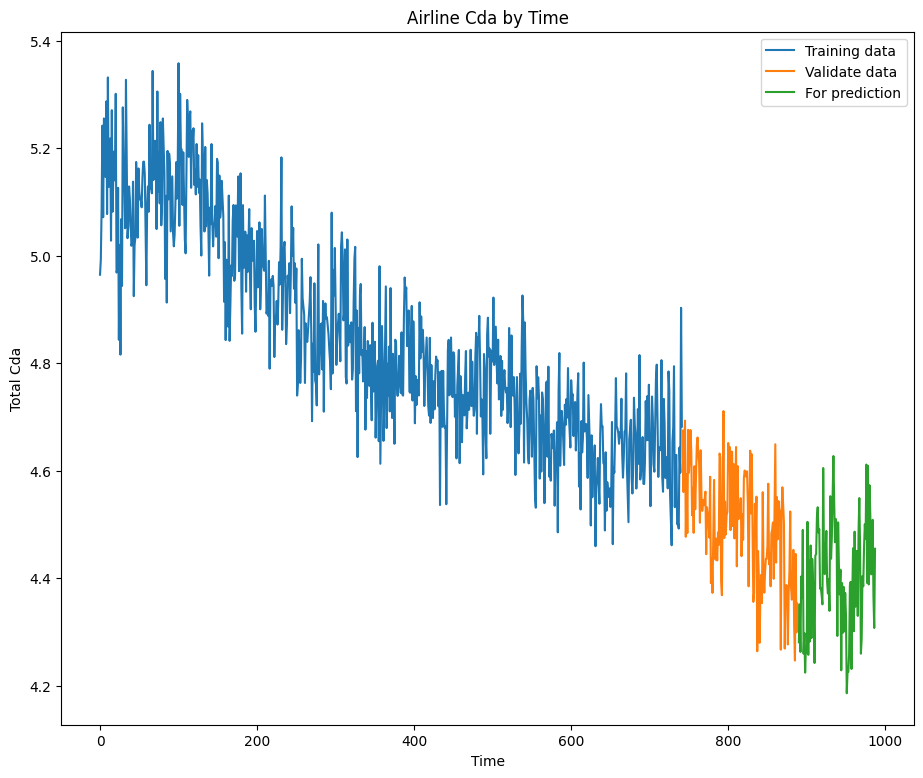

In [39]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.legend()
plt.title('Airline Cda by Time')
plt.ylabel('Total Cda')
plt.xlabel('Time')
plt.show()

In [40]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
# создаем объект модели на основе данных временного ряда с 3 лагами
mod = AutoReg(df.t, 3, old_names=False)
# обучаем
res = mod.fit()

# выводим сводку информации об авторегрессионной модели
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  988
Model:                     AutoReg(3)   Log Likelihood               22585.159
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Sun, 19 Nov 2023   AIC                         -45160.318
Time:                        23:31:19   BIC                         -45135.855
Sample:                             3   HQIC                        -45151.014
                                  988                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   5.66e-13   1.18e+12      0.000       0.667       0.667
t.L1           1.0000   5.65e-13   1.77e+12      0.000       1.000       1.000
t.L2           0.3333   9.95e-16   3.35e+14      0.0

In [41]:
# опять обучаем модель, но на этот раз указываем тип ковариационной оценки
res = mod.fit(cov_type="HC0")

# смотрим, что изменилось
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  988
Model:                     AutoReg(3)   Log Likelihood               22585.159
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Sun, 19 Nov 2023   AIC                         -45160.318
Time:                        23:31:19   BIC                         -45135.855
Sample:                             3   HQIC                        -45151.014
                                  988                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667    3.6e-13   1.85e+12      0.000       0.667       0.667
t.L1           1.0000   3.59e-13   2.78e+12      0.000       1.000       1.000
t.L2           0.3333   1.09e-15   3.07e+14      0.0

In [42]:
#Продолжаем экспериментировать
sel = ar_select_order(df.x, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  988
Model:                    AutoReg(10)   Log Likelihood                1000.035
Method:               Conditional MLE   S.D. of innovations              0.087
Date:                Sun, 19 Nov 2023   AIC                          -1976.070
Time:                        23:31:19   BIC                          -1917.444
Sample:                            10   HQIC                         -1953.764
                                  988                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0857      0.058      1.489      0.137      -0.027       0.199
x.L1           0.1987      0.032      6.245      0.000       0.136       0.261
x.L2           0.1719      0.032      5.308      0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


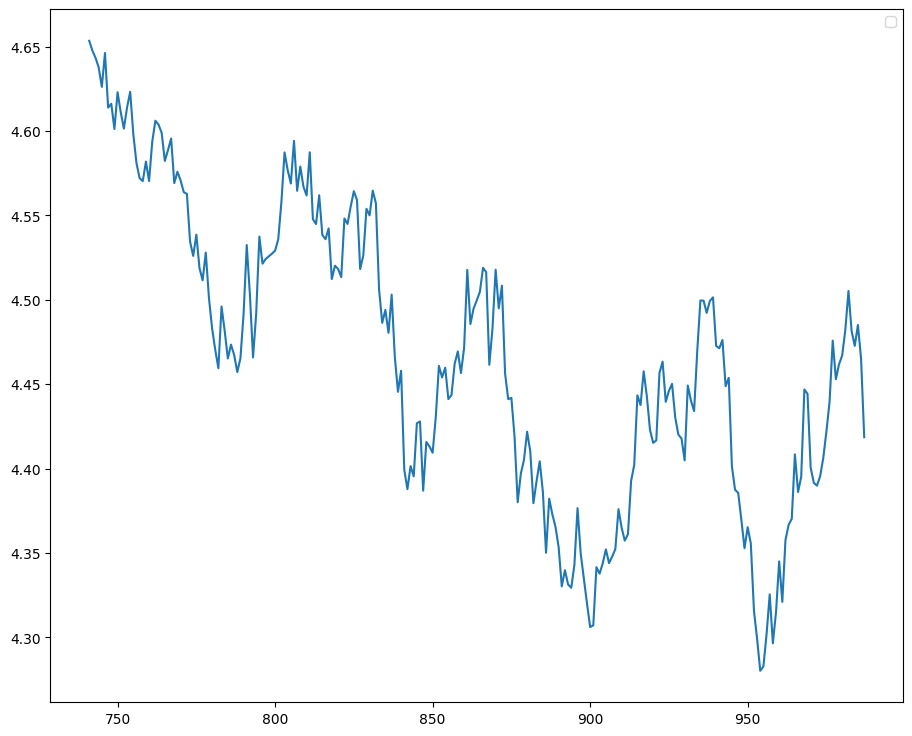

In [43]:
#Он предсказал

fig = res.plot_predict(train_cutoff)

In [44]:
#Все предсказанные временные ряды
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(df.t)-1]), dynamic=False)

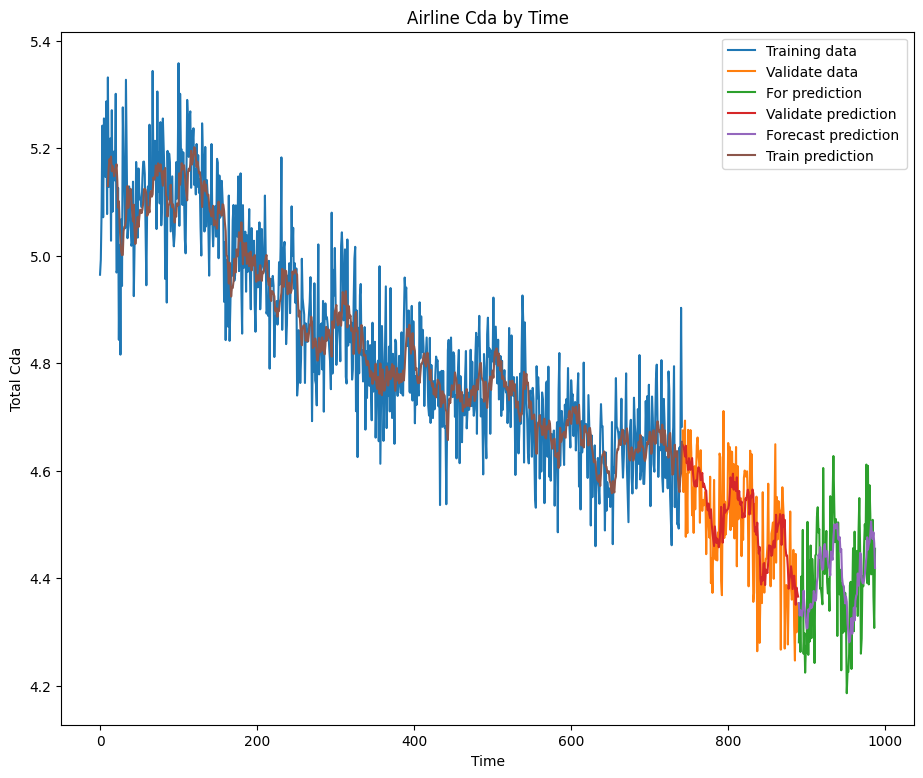

In [45]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Airline Cda by Time')
plt.ylabel('Total Cda')
plt.xlabel('Time')
plt.show()

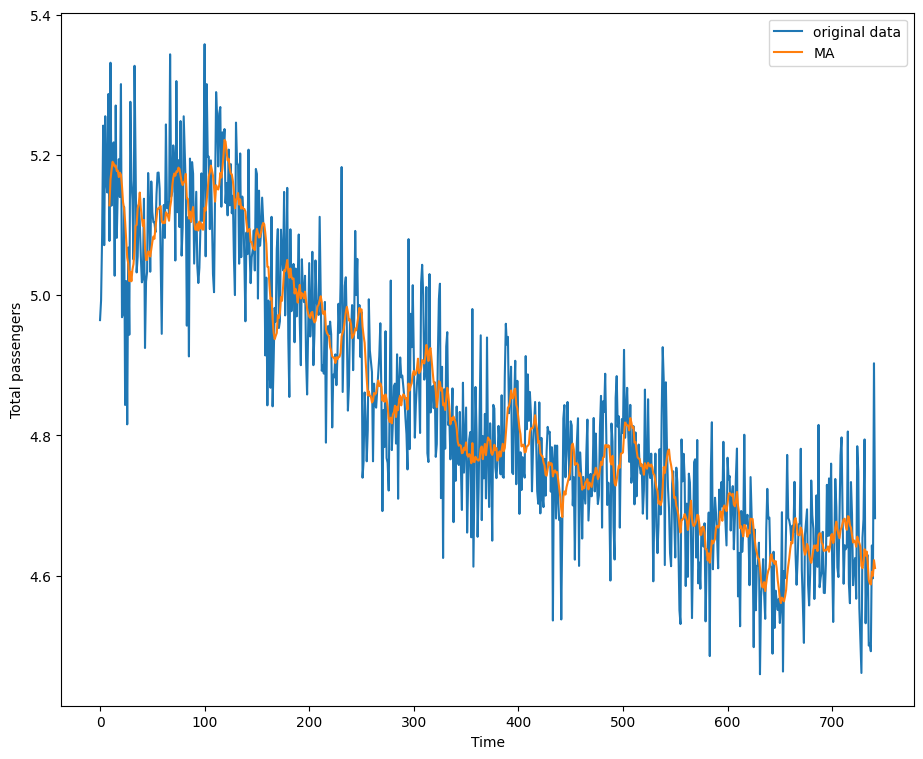

In [46]:
# MA

# указываем 'объемы' выборок
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

# делим выборки
train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")
plt.legend()
plt.ylabel('Total passengers')
plt.xlabel('Time')
plt.show()

Метрики точности прогноза

* R2- коэффициент детерминации     ​
* MSE (RMSE) – mean squared error – среднеквадратичная ошибка​
* MAE – mean absolute error – средняя абсолютная ошибка​
* MAPE – mean absolute percentage error – средняя абсолютная ошибка в %​
* SMAPE – symmetric mean absolute percentage error – симметричная средняя абсолютная ошибка в %

In [53]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

def calculate_smape(actual, predicted):   
    return round( 
        np.mean(np.abs(predicted - actual) / ((np.abs(predicted) + np.abs(actual)))), 19) 

In [54]:
print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("SMAPE:", calculate_smape(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))

RMSE: 0.09344617482576985
MAPE: 0.017732051118483687
SMAPE: 0.008867105455494004
MAE: 0.07802188053356869
R2:  0.1489765901320773
